<a href="https://colab.research.google.com/github/hidayetyakupoglu/wind-data/blob/main/T11_2016_HF1_new_cnn_bigru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [3]:
# prompt: https://github.com/hidayetyakupoglu/wind-data.git  bağlanmak istiyorum,

!git clone https://github.com/hidayetyakupoglu/wind-data.git


Cloning into 'wind-data'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 104.00 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (21/21), done.


In [4]:
!pip install openpyxl
!pip install xgboost
!pip install lightgbm
!pip install imbalanced-learn

In [5]:
# prompt: /content/wind-data/wind_fault.xlsx klasörünü aç
import pandas as pd
import openpyxl





In [6]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from tensorflow import keras

from numpy.random import seed

#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras.layers import GRU, LSTM
from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
sns.set_style('whitegrid')
%matplotlib inline
import keras
import keras.backend as k
from keras.layers import GRU, LSTM
from keras.models import Sequential
from keras.models import Model
from keras import regularizers
from keras.callbacks import History
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [7]:
df = pd.read_excel('/content/wind-data/T11_2016.xlsx')


In [149]:
df1=df.copy()
# prompt: veri çerçevesine fault sütunu ekle, bu satırın fault değerine 'GF' diğerlerine 'NF' yaz

# Assuming 'df' is your DataFrame and the timestamp column is named 'Timestamp'
df['Fault'] = 'NF'  # Initialize the 'Fault' column with 'NF' for all rows
df.loc[df['Timestamp'] == '2016-03-03T19:20:00+00:00', 'Fault'] = 'GF'
df.loc[df['Timestamp'] == '2016-10-17T17:50:00+00:00', 'Fault'] = 'HF'


In [150]:
# prompt: Unnamed: 0 adlı sütunu sil
dd0=df.copy()
ddf=dd0.copy()
ddf.drop('Turbine_ID', axis=1, inplace=True)
data=ddf.copy()
dd=data.copy()

In [151]:
perc=0.30   # test oranı orn:0.3 ise %70 train %30 testtir
fau='HF'   # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'HF'

In [152]:
# prompt: dd Timestamp index yap ve sıraya koy

# Convert the 'Timestamp' column to datetime objects
dd['Timestamp'] = pd.to_datetime(dd['Timestamp'])

# Set the 'Timestamp' column as the index
dd = dd.set_index('Timestamp')

# Sort the DataFrame by the index (Timestamp)
dd = dd.sort_index()

# Now your DataFrame 'dd' has a DateTimeIndex and is sorted chronologically.

In [153]:
# prompt: Amb_WindSpeed_Max  ve Grd_Prod_Pwr_Max sütunlarının bulunduğu df oluştur

df_newf = dd[['Amb_WindSpeed_Max', 'Grd_Prod_Pwr_Max']]
print(df_newf)

                           Amb_WindSpeed_Max  Grd_Prod_Pwr_Max
Timestamp                                                     
2016-01-01 00:00:00+00:00                8.6             368.9
2016-01-01 00:10:00+00:00               11.1             430.4
2016-01-01 00:20:00+00:00                9.9             468.3
2016-01-01 00:30:00+00:00                9.4             581.2
2016-01-01 00:40:00+00:00               11.6             641.9
...                                      ...               ...
2016-12-31 23:10:00+00:00               12.4            1349.3
2016-12-31 23:20:00+00:00               19.4            1353.9
2016-12-31 23:30:00+00:00               17.6            1318.9
2016-12-31 23:40:00+00:00               17.7             964.3
2016-12-31 23:50:00+00:00               13.0            1217.2

[52446 rows x 2 columns]


In [154]:
# Z-skoru yöntemi ile filtreleme
mean = df_newf.mean()
std_dev = df_newf.std()
z_scores = (df_newf - mean) / std_dev

threshold_z = 5
filtered_data_z = df_newf[(z_scores.abs() < threshold_z).all(axis=1)]

# IQR yöntemi ile filtreleme
Q1 = df_newf.quantile(0.25)
Q3 = df_newf.quantile(0.75)
IQR = Q3 - Q1
filtered_data_iqr = df_newf[~((df_newf < (Q1 - 1.5 * IQR)) | (df_newf > (Q3 + 1.5 * IQR))).any(axis=1)]

# Sonuçları görüntüleme
print("Z-skoru ile filtrelenmiş veri:")
print(filtered_data_z)
print("\nIQR ile filtrelenmiş veri:")
print(filtered_data_iqr)

Z-skoru ile filtrelenmiş veri:
                           Amb_WindSpeed_Max  Grd_Prod_Pwr_Max
Timestamp                                                     
2016-01-01 00:00:00+00:00                8.6             368.9
2016-01-01 00:10:00+00:00               11.1             430.4
2016-01-01 00:20:00+00:00                9.9             468.3
2016-01-01 00:30:00+00:00                9.4             581.2
2016-01-01 00:40:00+00:00               11.6             641.9
...                                      ...               ...
2016-12-31 23:10:00+00:00               12.4            1349.3
2016-12-31 23:20:00+00:00               19.4            1353.9
2016-12-31 23:30:00+00:00               17.6            1318.9
2016-12-31 23:40:00+00:00               17.7             964.3
2016-12-31 23:50:00+00:00               13.0            1217.2

[52439 rows x 2 columns]

IQR ile filtrelenmiş veri:
                           Amb_WindSpeed_Max  Grd_Prod_Pwr_Max
Timestamp                        

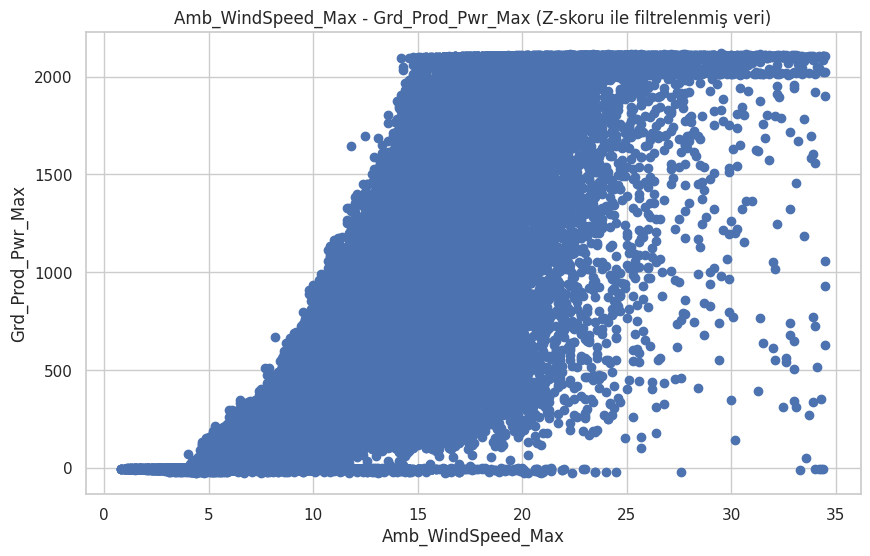

In [155]:
# prompt: Z-skoru ile filtrelenmiş veri nin Amb_WindSpeed_Max -Grd_Prod_Pwr_Max grafiğini çiz

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_iqr['Amb_WindSpeed_Max'], filtered_data_iqr['Grd_Prod_Pwr_Max'])
plt.xlabel('Amb_WindSpeed_Max')
plt.ylabel('Grd_Prod_Pwr_Max')
plt.title('Amb_WindSpeed_Max - Grd_Prod_Pwr_Max (Z-skoru ile filtrelenmiş veri)')
plt.show()

In [156]:
# prompt: (filtered_data_iqr['Amb_WindSpeed_Max'], filtered_data_iqr['Grd_Prod_Pwr_Max'] plotly ile çiz

fig = px.scatter(filtered_data_iqr, x='Amb_WindSpeed_Max', y='Grd_Prod_Pwr_Max',
                 title='Amb_WindSpeed_Max vs Grd_Prod_Pwr_Max (IQR ile filtrelenmiş veri)')
fig.show()

In [157]:
# prompt: 'Teorik Güç Eğrisi2 ve 'Teorik Güç Eğrisi fonksiyon şeklinde tanımla

def TeorikGucEgrisi(ruzgar_hizlari):
  # Sabitler
  rho = 1.225  # Hava yoğunluğu (kg/m^3)
  D = 2  # Türbin çapı (m)
  A = 1  # Kesit alanı (m^2)

  # Güç hesaplama
  guc = np.zeros_like(ruzgar_hizlari)

  # Rüzgar hızı aralığında güç hesaplama
  for i, v in enumerate(ruzgar_hizlari):
      if v >= 3 and v <= 15:  # Cut-in ve cut-off arası
          guc[i] = 0.5 * rho * A * v ** 3
      elif v > 15 and v <= 25:
          guc[i] = 2100 # Hız 15-25 arası olduğunda güç 2000 de sabit
  return guc


def TeorikGucEgrisi2(ruzgar_hizlari):
  # Sabitler
  rho = 1.225  # Hava yoğunluğu (kg/m^3)
  D = 2  # Türbin çapı (m)
  A = 1  # Kesit alanı (m^2)

  # Kaydırma miktarı
  kaydirma_miktari = 2

  # Rüzgar hızlarını kaydır
  ruzgar_hizlari_kaydir = ruzgar_hizlari + kaydirma_miktari

  # Güç hesaplama
  guc = np.zeros_like(ruzgar_hizlari)

  # Rüzgar hızı aralığında güç hesaplama
  for i, v in enumerate(ruzgar_hizlari):
      if v >= 3 and v <= 15:  # Cut-in ve cut-off arası
          guc[i] = 0.5 * rho * A * v ** 3
      elif v > 15 and v <= 25:
          guc[i] = 2100 # Hız 15-25 arası olduğunda güç 2000 de sabit
  return guc, ruzgar_hizlari_kaydir

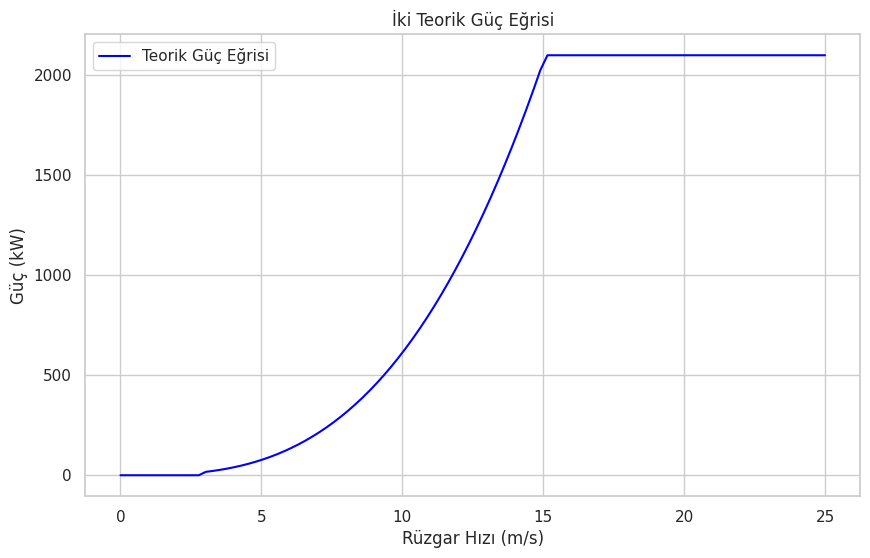

In [158]:
# prompt: her iki fonskiyonu çiz

plt.figure(figsize=(10, 6))

# TeorikGucEgrisi fonksiyonunu çiz
ruzgar_hizlari = np.linspace(0, 25, 100)
guc = TeorikGucEgrisi(ruzgar_hizlari)
plt.plot(ruzgar_hizlari, guc, label='Teorik Güç Eğrisi', color='blue')

plt.title('İki Teorik Güç Eğrisi')
plt.xlabel('Rüzgar Hızı (m/s)')
plt.ylabel('Güç (kW)')
plt.grid(True)
plt.legend()
plt.show()

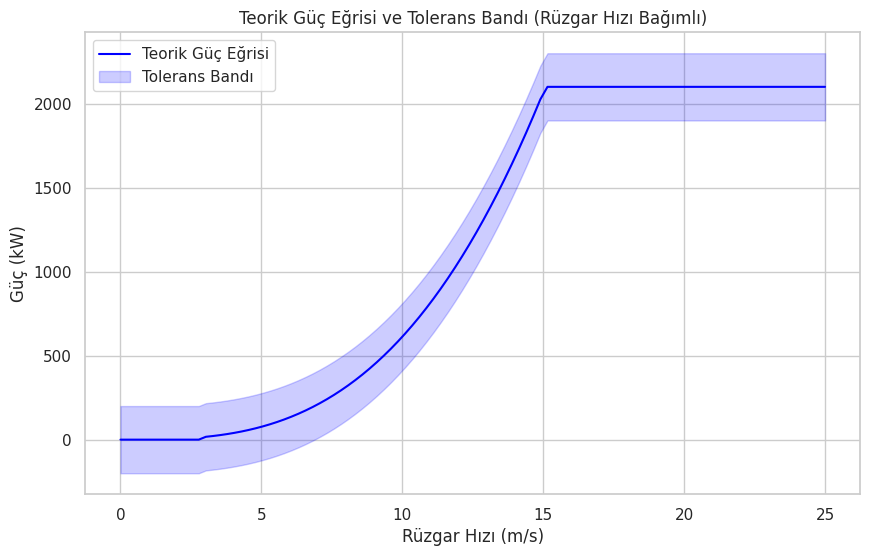

In [159]:
# prompt: rüzgar hızı 15 ten küçükse tolerans 20, büyükse 10 olsun çiz

plt.figure(figsize=(10, 6))

# TeorikGucEgrisi fonksiyonunu çiz
ruzgar_hizlari = np.linspace(0, 25, 100)
guc = TeorikGucEgrisi(ruzgar_hizlari)
plt.plot(ruzgar_hizlari, guc, label='Teorik Güç Eğrisi', color='blue')

# Tolerans bandı oluşturma
tolerans = np.where(ruzgar_hizlari < 15, 200, 200)  # Rüzgar hızı 15'ten küçükse tolerans 20, büyükse 10
ust_sinir = guc + tolerans
alt_sinir = guc - tolerans

# Tolerans bandını çiz
plt.fill_between(ruzgar_hizlari, alt_sinir, ust_sinir, color='blue', alpha=0.2, label='Tolerans Bandı')

plt.title('Teorik Güç Eğrisi ve Tolerans Bandı (Rüzgar Hızı Bağımlı)')
plt.xlabel('Rüzgar Hızı (m/s)')
plt.ylabel('Güç (kW)')
plt.grid(True)
plt.legend()
plt.show()

Tolerans bandı içindeki veri:
                           Amb_WindSpeed_Max  Grd_Prod_Pwr_Max
Timestamp                                                     
2016-01-01 00:00:00+00:00                8.6             368.9
2016-01-01 00:20:00+00:00                9.9             468.3
2016-01-01 00:30:00+00:00                9.4             581.2
2016-01-01 01:00:00+00:00                8.5             437.1
2016-01-01 01:10:00+00:00                7.7             276.7
...                                      ...               ...
2016-12-31 21:40:00+00:00               11.1             913.0
2016-12-31 22:20:00+00:00               10.8             799.2
2016-12-31 22:30:00+00:00               10.5             758.4
2016-12-31 23:10:00+00:00               12.4            1349.3
2016-12-31 23:50:00+00:00               13.0            1217.2

[28529 rows x 2 columns]


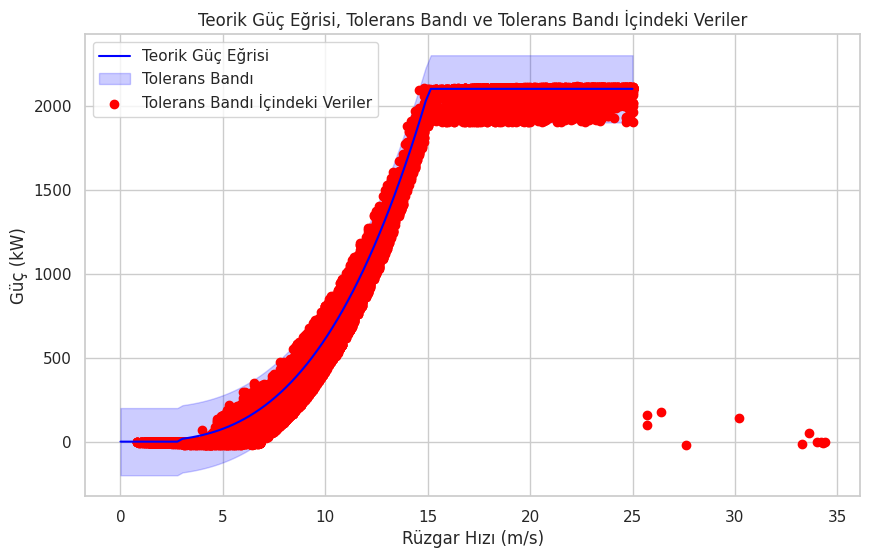

In [160]:
# prompt: tolerans bandının içerisindeki verileri seç

# Tolerans bandı içindeki verileri seçme
tolerans = 200  # Tolerans değeri
filtered_data_within_band = filtered_data_iqr[
    (filtered_data_iqr['Grd_Prod_Pwr_Max'] >= TeorikGucEgrisi(filtered_data_iqr['Amb_WindSpeed_Max']) - tolerans) &
    (filtered_data_iqr['Grd_Prod_Pwr_Max'] <= TeorikGucEgrisi(filtered_data_iqr['Amb_WindSpeed_Max']) + tolerans)
]

# Sonuçları görüntüleme
print("Tolerans bandı içindeki veri:")
print(filtered_data_within_band)

# Tolerans bandı içindeki verileri çiz
plt.figure(figsize=(10, 6))

# TeorikGucEgrisi fonksiyonunu çiz
ruzgar_hizlari = np.linspace(0, 25, 100)
guc = TeorikGucEgrisi(ruzgar_hizlari)
plt.plot(ruzgar_hizlari, guc, label='Teorik Güç Eğrisi', color='blue')

# Tolerans bandını çiz
ust_sinir = guc + tolerans
alt_sinir = guc - tolerans
plt.fill_between(ruzgar_hizlari, alt_sinir, ust_sinir, color='blue', alpha=0.2, label='Tolerans Bandı')

# Tolerans bandı içindeki verileri çiz
plt.scatter(filtered_data_within_band['Amb_WindSpeed_Max'], filtered_data_within_band['Grd_Prod_Pwr_Max'], color='red', label='Tolerans Bandı İçindeki Veriler')

plt.title('Teorik Güç Eğrisi, Tolerans Bandı ve Tolerans Bandı İçindeki Veriler')
plt.xlabel('Rüzgar Hızı (m/s)')
plt.ylabel('Güç (kW)')
plt.grid(True)
plt.legend()
plt.show()

final_df=filtered_data_within_band

In [161]:
ddf=final_df.copy()

In [162]:
# prompt: max wind speed > 15 ve max power output< 3000 olan NF verilerini temizle
ddf = ddf.drop(ddf[(ddf['Amb_WindSpeed_Max'] > 25) & (ddf.iloc[:, -1] == 'NF')].index)
ddf = ddf.drop(ddf[(ddf['Grd_Prod_Pwr_Max'] <= 0) & (ddf.iloc[:, -1] == 'NF')].index)
ddf = ddf.drop(ddf[(ddf['Grd_Prod_Pwr_Max'] > 2200) & (ddf.iloc[:, -1] == 'NF')].index)


In [163]:
# prompt: Amb_WindSpeed_Max değeri 25 ten büyük olan verileri temizle

ddf = ddf[~(ddf['Amb_WindSpeed_Max'] > 25)]
# prompt: ddf Amb_WindSpeed_Max Grd_Prod_Pwr_Max grafiğini plotly kullanarak çiz

import plotly.express as px

fig = px.scatter(ddf, x='Amb_WindSpeed_Max', y='Grd_Prod_Pwr_Max', title='Amb_WindSpeed_Max vs Grd_Prod_Pwr_Max')
fig.show()

In [164]:
# prompt: dd verisetindeki index değerlerininden ddf index değerlerinde eşit olan satırları seç

# Assuming 'dd' and 'ddf' are your DataFrames
# Find the common indices between dd and ddf
common_indices = dd.index.intersection(ddf.index)

# Select rows from 'dd' that have the same index values as in 'ddf'
data = dd.loc[common_indices]

# Print the selected rows from 'dd'
print(data)

                           Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00   

In [165]:
#data=dd    # filtresiz

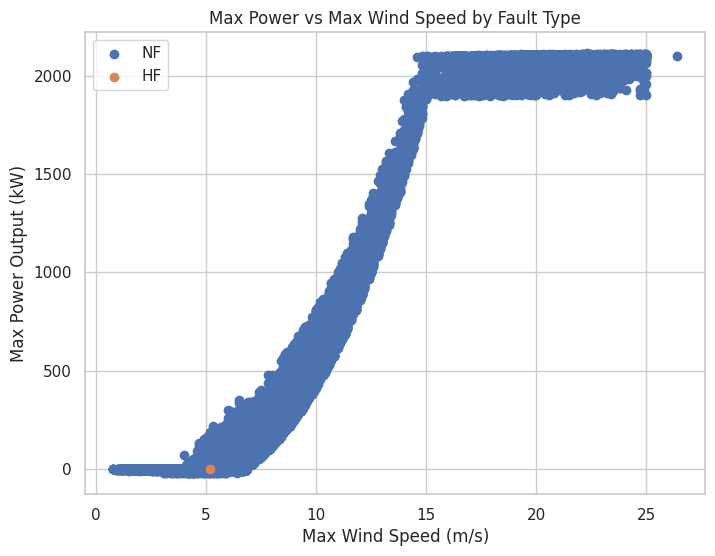

In [166]:

plt.figure(figsize=(8, 6))
for fault in data['Fault'].unique():
  subset = data[data['Fault'] == fault]
  plt.scatter(subset['Amb_WindSpeed_Max'], subset['Grd_Prod_Pwr_Max'], label=fault)

plt.xlabel('Max Wind Speed (m/s)')
plt.ylabel('Max Power Output (kW)')
plt.title('Max Power vs Max Wind Speed by Fault Type')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
data = data[data['Fault'].isin([fau, 'NF'])]


In [168]:
# Calculate the count of each fault class
fault_counts = data['Fault'].value_counts()

# Print the counts
print(fault_counts)


Fault
NF    28518
HF        1
Name: count, dtype: int64


data_n1 = data[(data['DateTime_x'] >= '2014-05-10') & (data['DateTime_x'] <= '2014-05-14 14:30:00	')]
data_n2 = data[(data['DateTime_x'] >= '2014-10-13') & (data['DateTime_x'] <= '2014-10-17 11:30:00	')]
data_n3 = data[(data['DateTime_x'] >= '2014-10-22') & (data['DateTime_x'] <= '2014-10-26 18:00:00	')]
data_n4 = data[(data['DateTime_x'] >= '2015-01-03') & (data['DateTime_x'] <= '2015-01-07 18:00:00	')]

In [169]:
#data = data.drop('WEC: Production kWh', axis=1)
#data=data.drop('WEC: min. Power',axis=1)
#data=data.drop('WEC: ava. available P from wind',axis=1)
#data=data.drop('RTU: ava. Setpoint 1',axis=1)
#data_nf = data[data.Fault == 'NF'].sample(40000, random_state = 123)
data_nf=data[data.Fault == 'NF']
data_allF = data[data.Fault != 'NF']


In [170]:
data=data.sort_index()

In [171]:
data

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00       1676.9       1411.1       1625.1         51.6   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00                 42                   59   
2016-01-01 00:20:00+00:00                 43                   60   
2016-01-01 00:30:00+00:00                 43                   60   
2016-01-01 01:00:00+00:00                 44                   61   
2016-01-01 01:10:00+00:00                 44                   61   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00                 40                   58   
2016-12-31 22:20:00+00:00                 40                   58   
2016-12-31 22:30:00+00:00                 40                   58   
2016-12-31 23:10:00+00:00                 40                   59   
2016-12-31 23:50:00+00:00                 41                   61   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   61                   60   
2016-01-01 00:20:00+00:00                   61                   61   
2016-01-01 00:30:00+00:00                   62                   61   
2016-01-01 01:00:00+00:00                   62                   61   
2016-01-01 01:10:00+00:00                   62                   61   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00                   59                   58   
2016-12-31 22:20:00+00:00                   59                   59   
2016-12-31 22:30:00+00:00                   59                   58   
2016-12-31 23:10:00+00:00                   60                   60   
2016-12-31 23:50:00+00:00                   62                   62   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00                30                 48  ...   
2016-01-01 00:20:00+00:00                30                 49  ...   
2016-01-01 00:30:00+00:00                30                 49  ...   
2016-01-01 01:00:00+00:00                30                 50  ...   
2016-01-01 01:10:00+00:00                30                 49  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00                27                 53  ...   
2016-12-31 22:20:00+00:00                26                 53  ...   
2016-12-31 22:30:00+00:00                26                 53  ...   
2016-12-31 23:10:00+00:00                26                 54  ...   
2016-12-31 23:50:00+00:00                25                 55  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -752.6                -1000.0   
20

In [172]:
#data=data.set_index('DateTime_x')
data=data.sort_index()
data

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00       1676.9       1411.1       1625.1         51.6   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00                 42                   59   
2016-01-01 00:20:00+00:00                 43                   60   
2016-01-01 00:30:00+00:00                 43                   60   
2016-01-01 01:00:00+00:00                 44                   61   
2016-01-01 01:10:00+00:00                 44                   61   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00                 40                   58   
2016-12-31 22:20:00+00:00                 40                   58   
2016-12-31 22:30:00+00:00                 40                   58   
2016-12-31 23:10:00+00:00                 40                   59   
2016-12-31 23:50:00+00:00                 41                   61   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   61                   60   
2016-01-01 00:20:00+00:00                   61                   61   
2016-01-01 00:30:00+00:00                   62                   61   
2016-01-01 01:00:00+00:00                   62                   61   
2016-01-01 01:10:00+00:00                   62                   61   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00                   59                   58   
2016-12-31 22:20:00+00:00                   59                   59   
2016-12-31 22:30:00+00:00                   59                   58   
2016-12-31 23:10:00+00:00                   60                   60   
2016-12-31 23:50:00+00:00                   62                   62   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00                30                 48  ...   
2016-01-01 00:20:00+00:00                30                 49  ...   
2016-01-01 00:30:00+00:00                30                 49  ...   
2016-01-01 01:00:00+00:00                30                 50  ...   
2016-01-01 01:10:00+00:00                30                 49  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00                27                 53  ...   
2016-12-31 22:20:00+00:00                26                 53  ...   
2016-12-31 22:30:00+00:00                26                 53  ...   
2016-12-31 23:10:00+00:00                26                 54  ...   
2016-12-31 23:50:00+00:00                25                 55  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -752.6                -1000.0   
20

In [173]:

data_af=data
data_af = data_af.sort_index()
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)


In [174]:
data_af

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00       1676.9       1411.1       1625.1         51.6   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00                 42                   59   
2016-01-01 00:20:00+00:00                 43                   60   
2016-01-01 00:30:00+00:00                 43                   60   
2016-01-01 01:00:00+00:00                 44                   61   
2016-01-01 01:10:00+00:00                 44                   61   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00                 40                   58   
2016-12-31 22:20:00+00:00                 40                   58   
2016-12-31 22:30:00+00:00                 40                   58   
2016-12-31 23:10:00+00:00                 40                   59   
2016-12-31 23:50:00+00:00                 41                   61   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   61                   60   
2016-01-01 00:20:00+00:00                   61                   61   
2016-01-01 00:30:00+00:00                   62                   61   
2016-01-01 01:00:00+00:00                   62                   61   
2016-01-01 01:10:00+00:00                   62                   61   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00                   59                   58   
2016-12-31 22:20:00+00:00                   59                   59   
2016-12-31 22:30:00+00:00                   59                   58   
2016-12-31 23:10:00+00:00                   60                   60   
2016-12-31 23:50:00+00:00                   62                   62   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00                30                 48  ...   
2016-01-01 00:20:00+00:00                30                 49  ...   
2016-01-01 00:30:00+00:00                30                 49  ...   
2016-01-01 01:00:00+00:00                30                 50  ...   
2016-01-01 01:10:00+00:00                30                 49  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00                27                 53  ...   
2016-12-31 22:20:00+00:00                26                 53  ...   
2016-12-31 22:30:00+00:00                26                 53  ...   
2016-12-31 23:10:00+00:00                26                 54  ...   
2016-12-31 23:50:00+00:00                25                 55  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -752.6                -1000.0   
20

In [175]:
# prompt: 2014-11-28 16:30:00 tarihinden sonraki satırları temizle

#data_af = data_af[data_af.index <= '2015-01-11 09:00:00']


In [176]:
data_af

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00       1676.9       1411.1       1625.1         51.6   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00                 42                   59   
2016-01-01 00:20:00+00:00                 43                   60   
2016-01-01 00:30:00+00:00                 43                   60   
2016-01-01 01:00:00+00:00                 44                   61   
2016-01-01 01:10:00+00:00                 44                   61   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00                 40                   58   
2016-12-31 22:20:00+00:00                 40                   58   
2016-12-31 22:30:00+00:00                 40                   58   
2016-12-31 23:10:00+00:00                 40                   59   
2016-12-31 23:50:00+00:00                 41                   61   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   61                   60   
2016-01-01 00:20:00+00:00                   61                   61   
2016-01-01 00:30:00+00:00                   62                   61   
2016-01-01 01:00:00+00:00                   62                   61   
2016-01-01 01:10:00+00:00                   62                   61   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00                   59                   58   
2016-12-31 22:20:00+00:00                   59                   59   
2016-12-31 22:30:00+00:00                   59                   58   
2016-12-31 23:10:00+00:00                   60                   60   
2016-12-31 23:50:00+00:00                   62                   62   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00                30                 48  ...   
2016-01-01 00:20:00+00:00                30                 49  ...   
2016-01-01 00:30:00+00:00                30                 49  ...   
2016-01-01 01:00:00+00:00                30                 50  ...   
2016-01-01 01:10:00+00:00                30                 49  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00                27                 53  ...   
2016-12-31 22:20:00+00:00                26                 53  ...   
2016-12-31 22:30:00+00:00                26                 53  ...   
2016-12-31 23:10:00+00:00                26                 54  ...   
2016-12-31 23:50:00+00:00                25                 55  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -752.6                -1000.0   
20

In [177]:
# prompt: duplikeleri sil

data_af = data_af[~data_af.index.duplicated(keep='first')]


In [178]:
data_af

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9         18.8   
2016-01-01 00:20:00+00:00       1423.6       1270.8       1344.3         27.2   
2016-01-01 00:30:00+00:00       1470.1       1258.7       1377.5         48.9   
2016-01-01 01:00:00+00:00       1401.2       1238.4       1280.6         27.9   
2016-01-01 01:10:00+00:00       1293.3       1235.6       1257.1         10.9   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00       1613.9       1331.2       1498.2         65.1   
2016-12-31 22:20:00+00:00       1592.3       1330.5       1476.5         57.8   
2016-12-31 22:30:00+00:00       1582.1       1286.5       1450.0         62.5   
2016-12-31 23:10:00+00:00       1671.9       1461.9       1599.5         50.5   
2016-12-31 23:50:00+00:00       1676.9       1411.1       1625.1         51.6   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00                 42                   59   
2016-01-01 00:20:00+00:00                 43                   60   
2016-01-01 00:30:00+00:00                 43                   60   
2016-01-01 01:00:00+00:00                 44                   61   
2016-01-01 01:10:00+00:00                 44                   61   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00                 40                   58   
2016-12-31 22:20:00+00:00                 40                   58   
2016-12-31 22:30:00+00:00                 40                   58   
2016-12-31 23:10:00+00:00                 40                   59   
2016-12-31 23:50:00+00:00                 41                   61   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00                   61                   60   
2016-01-01 00:20:00+00:00                   61                   61   
2016-01-01 00:30:00+00:00                   62                   61   
2016-01-01 01:00:00+00:00                   62                   61   
2016-01-01 01:10:00+00:00                   62                   61   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00                   59                   58   
2016-12-31 22:20:00+00:00                   59                   59   
2016-12-31 22:30:00+00:00                   59                   58   
2016-12-31 23:10:00+00:00                   60                   60   
2016-12-31 23:50:00+00:00                   62                   62   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00                30                 48  ...   
2016-01-01 00:20:00+00:00                30                 49  ...   
2016-01-01 00:30:00+00:00                30                 49  ...   
2016-01-01 01:00:00+00:00                30                 50  ...   
2016-01-01 01:10:00+00:00                30                 49  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00                27                 53  ...   
2016-12-31 22:20:00+00:00                26                 53  ...   
2016-12-31 22:30:00+00:00                26                 53  ...   
2016-12-31 23:10:00+00:00                26                 54  ...   
2016-12-31 23:50:00+00:00                25                 55  ...   

                           Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 -752.6                -1000.0   
20

In [179]:
data_afx= data_af.drop(columns=['Fault'])
data_afy=data_af['Fault']

In [180]:
data_afy

Timestamp
2016-01-01 00:00:00+00:00    0
2016-01-01 00:20:00+00:00    0
2016-01-01 00:30:00+00:00    0
2016-01-01 01:00:00+00:00    0
2016-01-01 01:10:00+00:00    0
                            ..
2016-12-31 21:40:00+00:00    0
2016-12-31 22:20:00+00:00    0
2016-12-31 22:30:00+00:00    0
2016-12-31 23:10:00+00:00    0
2016-12-31 23:50:00+00:00    0
Name: Fault, Length: 28513, dtype: int64

In [181]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [182]:
x_new

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00     0.721154     0.742013     0.755140     0.025144   
2016-01-01 00:20:00+00:00     0.766489     0.764575     0.798752     0.036378   
2016-01-01 00:30:00+00:00     0.791525     0.757295     0.818479     0.065401   
2016-01-01 01:00:00+00:00     0.754428     0.745082     0.760903     0.037314   
2016-01-01 01:10:00+00:00     0.696333     0.743397     0.746940     0.014578   
...                                ...          ...          ...          ...   
2016-12-31 21:40:00+00:00     0.868950     0.800915     0.890196     0.087067   
2016-12-31 22:20:00+00:00     0.857320     0.800493     0.877302     0.077304   
2016-12-31 22:30:00+00:00     0.851828     0.774021     0.861557     0.083590   
2016-12-31 23:10:00+00:00     0.900178     0.879550     0.950386     0.067540   
2016-12-31 23:50:00+00:00     0.902870     0.848986     0.965597     0.069012   

                           Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
Timestamp                                                           
2016-01-01 00:00:00+00:00           0.328571             0.346154   
2016-01-01 00:20:00+00:00           0.342857             0.355769   
2016-01-01 00:30:00+00:00           0.342857             0.355769   
2016-01-01 01:00:00+00:00           0.357143             0.365385   
2016-01-01 01:10:00+00:00           0.357143             0.365385   
...                                      ...                  ...   
2016-12-31 21:40:00+00:00           0.300000             0.336538   
2016-12-31 22:20:00+00:00           0.300000             0.336538   
2016-12-31 22:30:00+00:00           0.300000             0.336538   
2016-12-31 23:10:00+00:00           0.300000             0.346154   
2016-12-31 23:50:00+00:00           0.314286             0.365385   

                           Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
Timestamp                                                             
2016-01-01 00:00:00+00:00             0.368932             0.359223   
2016-01-01 00:20:00+00:00             0.368932             0.368932   
2016-01-01 00:30:00+00:00             0.378641             0.368932   
2016-01-01 01:00:00+00:00             0.378641             0.368932   
2016-01-01 01:10:00+00:00             0.378641             0.368932   
...                                        ...                  ...   
2016-12-31 21:40:00+00:00             0.349515             0.339806   
2016-12-31 22:20:00+00:00             0.349515             0.349515   
2016-12-31 22:30:00+00:00             0.349515             0.339806   
2016-12-31 23:10:00+00:00             0.359223             0.359223   
2016-12-31 23:50:00+00:00             0.378641             0.378641   

                           Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Timestamp                                                       ...   
2016-01-01 00:00:00+00:00           0.25000            0.59375  ...   
2016-01-01 00:20:00+00:00           0.25000            0.62500  ...   
2016-01-01 00:30:00+00:00           0.25000            0.62500  ...   
2016-01-01 01:00:00+00:00           0.25000            0.65625  ...   
2016-01-01 01:10:00+00:00           0.25000            0.62500  ...   
...                                     ...                ...  ...   
2016-12-31 21:40:00+00:00           0.15625            0.75000  ...   
2016-12-31 22:20:00+00:00           0.12500            0.75000  ...   
2016-12-31 22:30:00+00:00           0.12500            0.75000  ...   
2016-12-31 23:10:00+00:00           0.12500            0.78125  ...   
2016-12-31 23:50:00+00:00           0.09375            0.81250  ...   

                           Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00                 0.0266                 0.2474   
20

In [183]:
# prompt: Xgboost ile feature selection uygulka

import xgboost as xgb

# Create an XGBClassifier object
model = xgb.XGBClassifier()


# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_xgb = feature_importances['feature'][:15]


                        feature  importance
66        Grd_Prod_ReactPwr_Std    0.141683
26  Prod_LatestAvg_ReactPwrGen0    0.132737
65        Grd_Prod_ReactPwr_Min    0.122686
63        Grd_Prod_ReactPwr_Avg    0.120254
29   Prod_LatestAvg_TotReactPwr    0.097810
64        Grd_Prod_ReactPwr_Max    0.083082
56        Grd_Prod_CurPhse3_Avg    0.057481
39          Blds_PitchAngle_Min    0.055485
19     Amb_WindDir_Relative_Avg    0.047613
20          Amb_WindDir_Abs_Avg    0.047538
8              Hyd_Oil_Temp_Avg    0.035276
59          Grd_Busbar_Temp_Avg    0.031817
16            Amb_WindSpeed_Min    0.026536
53       Grd_Prod_VoltPhse3_Avg    0.000000
55        Grd_Prod_CurPhse2_Avg    0.000000


In [184]:
# Ensure x_new and data_afy have the same number of rows
x_new = x_new.loc[data_afy.index]  # Select rows from x_new that match the index of data_afy

# Convert data_afy to a consistent data type (e.g., all integers)
data_afy = pd.to_numeric(data_afy, errors='coerce') # 'coerce' will replace invalid values with NaN

# If you have NaN values after conversion, handle them (e.g., drop rows or impute values)
# For this example, let's drop rows with NaNs
data_afy = data_afy.dropna()
x_new = x_new.loc[data_afy.index]  # Update x_new again after dropping NaNs from data_afy

# Create an XGBClassifier object
model = xgb.XGBClassifier()

# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_xgb = feature_importances['feature'][:15]

                        feature  importance
66        Grd_Prod_ReactPwr_Std    0.141683
26  Prod_LatestAvg_ReactPwrGen0    0.132737
65        Grd_Prod_ReactPwr_Min    0.122686
63        Grd_Prod_ReactPwr_Avg    0.120254
29   Prod_LatestAvg_TotReactPwr    0.097810
64        Grd_Prod_ReactPwr_Max    0.083082
56        Grd_Prod_CurPhse3_Avg    0.057481
39          Blds_PitchAngle_Min    0.055485
19     Amb_WindDir_Relative_Avg    0.047613
20          Amb_WindDir_Abs_Avg    0.047538
8              Hyd_Oil_Temp_Avg    0.035276
59          Grd_Busbar_Temp_Avg    0.031817
16            Amb_WindSpeed_Min    0.026536
53       Grd_Prod_VoltPhse3_Avg    0.000000
55        Grd_Prod_CurPhse2_Avg    0.000000


In [185]:
# prompt: feature selection threshold 0.02 nin altındakileri çıkart

# Filter features with importance greater than 0.02
selected_features_xgb = feature_importances[feature_importances['importance'] > 0.05]['feature']
dim=len(selected_features_xgb)
dim

8

In [186]:
# prompt: kaç adet olduğunu belirle

len(selected_features_xgb)


8

In [187]:
# prompt: Dense-Net kullanarak feature selection yap
'''

from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new, data_afy, test_size=0.2, random_state=42)

# Define the Dense-Net model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(x_new.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Get the feature importances from the trained model
importances = model.layers[0].get_weights()[0]
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': np.mean(np.abs(importances), axis=1)})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_dense = feature_importances['feature'][:15]

'''

"\n\nfrom keras.layers import Dense\nfrom keras.models import Sequential\nfrom sklearn.model_selection import train_test_split\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(x_new, data_afy, test_size=0.2, random_state=42)\n\n# Define the Dense-Net model\nmodel = Sequential()\nmodel.add(Dense(64, activation='tanh', input_shape=(x_new.shape[1],)))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n# Train the model\nmodel.fit(X_train, y_train, epochs=20, batch_size=32)\n\n# Evaluate the model\nloss, accuracy = model.evaluate(X_test, y_test)\nprint('Test accuracy:', accuracy)\n\n# Get the feature importances from the trained model\nimportances = model.layers[0].get_weights()[0]\nfeature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': np.mean(np.abs(importances), axis=1)})\

In [188]:
my_dict = {}
my_list = selected_features_xgb          #kbest             common_selected               #my_list = selectlist
my_tuple = tuple(my_list)
my_dict[my_tuple] = "value"
my_tuple

('Grd_Prod_ReactPwr_Std',
 'Prod_LatestAvg_ReactPwrGen0',
 'Grd_Prod_ReactPwr_Min',
 'Grd_Prod_ReactPwr_Avg',
 'Prod_LatestAvg_TotReactPwr',
 'Grd_Prod_ReactPwr_Max',
 'Grd_Prod_CurPhse3_Avg',
 'Blds_PitchAngle_Min')

In [189]:
my_list

66          Grd_Prod_ReactPwr_Std
26    Prod_LatestAvg_ReactPwrGen0
65          Grd_Prod_ReactPwr_Min
63          Grd_Prod_ReactPwr_Avg
29     Prod_LatestAvg_TotReactPwr
64          Grd_Prod_ReactPwr_Max
56          Grd_Prod_CurPhse3_Avg
39            Blds_PitchAngle_Min
Name: feature, dtype: object

In [190]:
x_new = x_new.reindex(columns = my_tuple)
x_new['Fault']=data_af['Fault']
data_af=x_new
corr_matrixx = data_af.corr()
corr_matrixx['Fault'].sort_values(ascending=False)

Fault                          1.000000
Blds_PitchAngle_Min            0.037299
Prod_LatestAvg_TotReactPwr     0.006157
Grd_Prod_ReactPwr_Avg          0.006157
Prod_LatestAvg_ReactPwrGen0    0.005871
Grd_Prod_ReactPwr_Min          0.005762
Grd_Prod_ReactPwr_Max          0.000616
Grd_Prod_ReactPwr_Std         -0.002566
Grd_Prod_CurPhse3_Avg         -0.004730
Name: Fault, dtype: float64

In [191]:
data_af

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00               0.011297                     0.878939   
2016-01-01 00:20:00+00:00               0.028920                     0.878939   
2016-01-01 00:30:00+00:00               0.007682                     0.878939   
2016-01-01 01:00:00+00:00               0.007456                     0.878939   
2016-01-01 01:10:00+00:00               0.008812                     0.878939   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.006326                     0.878939   
2016-12-31 22:20:00+00:00               0.008360                     0.878939   
2016-12-31 22:30:00+00:00               0.006100                     0.878939   
2016-12-31 23:10:00+00:00               0.007908                     0.878939   
2016-12-31 23:50:00+00:00               0.008812                     0.878939   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00               0.822283               0.507414   
2016-01-01 00:20:00+00:00               0.814977               0.487025   
2016-01-01 00:30:00+00:00               0.817717               0.480229   
2016-01-01 01:00:00+00:00               0.832420               0.506333   
2016-01-01 01:10:00+00:00               0.834064               0.511585   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.807215               0.463546   
2016-12-31 22:20:00+00:00               0.802100               0.456596   
2016-12-31 22:30:00+00:00               0.807397               0.462156   
2016-12-31 23:10:00+00:00               0.799361               0.448255   
2016-12-31 23:50:00+00:00               0.796712               0.447019   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-01-01 00:00:00+00:00                    0.505458               0.156066   
2016-01-01 00:20:00+00:00                    0.484956               0.186992   
2016-01-01 00:30:00+00:00                    0.478227               0.143153   
2016-01-01 01:00:00+00:00                    0.504388               0.153834   
2016-01-01 01:10:00+00:00                    0.509646               0.158935   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.461270               0.131197   
2016-12-31 22:20:00+00:00                    0.454495               0.129045   
2016-12-31 22:30:00+00:00                    0.460023               0.128806   
2016-12-31 23:10:00+00:00                    0.446286               0.126335   
2016-12-31 23:50:00+00:00                    0.444909               0.124024   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-01-01 00:00:00+00:00               0.127922             0.012903      0  
2016-01-01 00:20:00+00:00               0.187849             0.011828      0  
2016-01-01 00:30:00+00:00               0.237570             0.007527      0  
2016-01-01 01:00:00+00:00               0.134093             0.007527      0  
2016-01-01 01:10:00+00:00               0.110775             0.015054      0  
...                                          ...                  ...    ...  
2016-12-31 21:40:00+00:00               0.320161             0.009677      0  
2016-12-31 22:20:00+00:00               0.302302             0.009677      0  
2016-12-31 22:30:00+00:00               0.289368             0.008602      0  
2016-12-31 23:10:00+00:00               0.432657             0.009677      0  
2016-12-

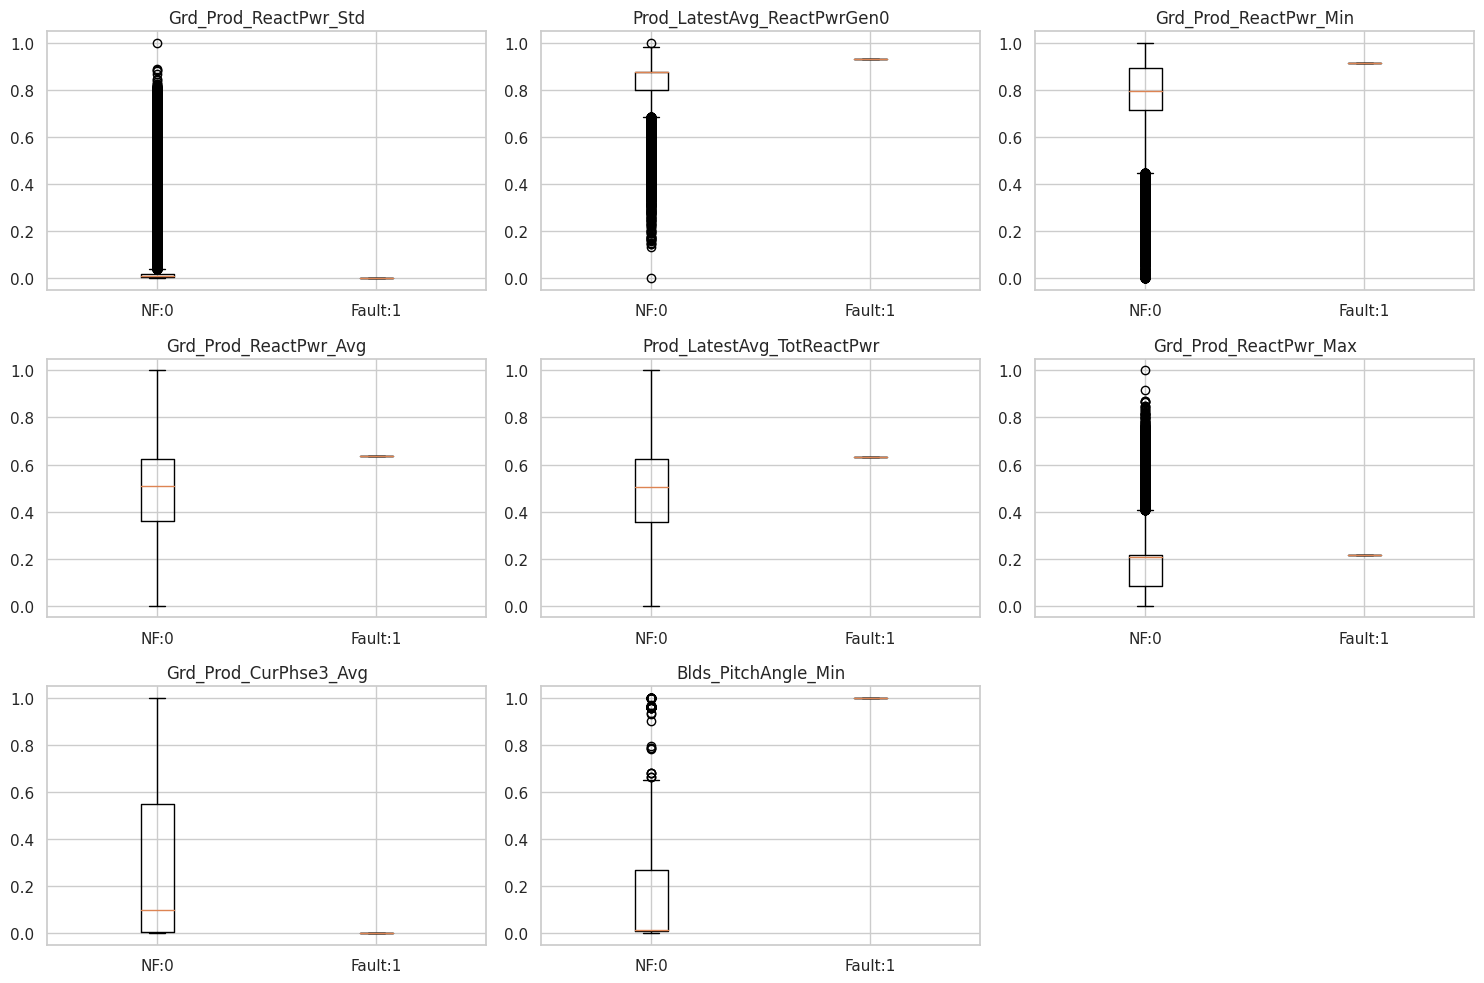

In [192]:
features = selected_features_xgb
ddf=data_af.copy()

# Filter the data for NF and EF
data_nf = ddf[ddf['Fault'] == 0][features]
data_ef = ddf[ddf['Fault'] == 1][features]

# Create box plots for each feature
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for subplots
num_rows = int(len(features) / 3) + (len(features) % 3 > 0)  # Calculate the number of rows needed

for i, feature in enumerate(features):
  plt.subplot(num_rows, 3, i + 1) # Use num_rows to create enough subplots
  plt.boxplot([data_nf[feature], data_ef[feature]], labels=['NF:0', 'Fault:1'])
  plt.title(feature)

plt.tight_layout()
plt.show()

In [235]:
# prompt: data_nf remove outliers

# Sadece NF verilerini al
nf_data = data_af[data_af['Fault'] == 0]

# Her sütun için boxplot çiz ve aykırı değerleri tespit et
for column in nf_data.columns[:-1]:  # Son sütun 'Fault', onu hariç tutuyoruz
  if nf_data[column].dtype != 'datetime64[ns]': #Datetime columns cannot be processed by boxplot


    # IQR kullanarak aykırı değerleri tespit et
    Q1 = nf_data[column].quantile(0.05)
    Q3 = nf_data[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    nf_data = nf_data[(nf_data[column] >= lower_bound) & (nf_data[column] <= upper_bound)]


# Temizlenmiş NF verilerini ddf'ye geri ata
data_af = pd.concat([data_af[data_af['Fault'] != 0], nf_data]) # Changed append to concat

data_af=data_af.sort_index()


In [236]:
# prompt: remove ef_data outliers

# Sadece EF verilerini al
ef_data = data_af[data_af['Fault'] == 1]

# Her sütun için boxplot çiz ve aykırı değerleri tespit et
for column in ef_data.columns[:-1]:  # Son sütun 'Fault', onu hariç tutuyoruz
  if ef_data[column].dtype != 'datetime64[ns]': #Datetime columns cannot be processed by boxplot


    # IQR kullanarak aykırı değerleri tespit et
    Q1 = ef_data[column].quantile(0.25)
    Q3 = ef_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    ef_data = ef_data[(ef_data[column] >= lower_bound) & (ef_data[column] <= upper_bound)]


# Temizlenmiş EF verilerini data_af'ye geri ata
data_af = pd.concat([data_af[data_af['Fault'] != 1], ef_data]) # Changed append to concat

data_af=data_af.sort_index()


In [237]:
data_af[data_af['Fault'] != 0]

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-17 17:50:00+00:00               0.000452                     0.933941   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-17 17:50:00+00:00               0.914612               0.634538   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-17 17:50:00+00:00                    0.633147               0.215128   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-10-17 17:50:00+00:00               0.000415                  1.0      1

In [238]:
# prompt: 2014-12-09 01:49:00	tarihinden itibaren test verisi olsun

test_date = '2016-10-08T23:00:00+00:00'

trainhy = data_af[data_af.index < test_date]
testhy = data_af[data_af.index >= test_date]




In [239]:
#percent = round(len(data_af) - len(data_af)*perc)
#trainhy = data_af.iloc[ :percent, :]

#testhy= data_af.iloc[percent: ,:]

In [240]:
testhy

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-08 23:00:00+00:00               0.007004                     0.702045   
2016-10-08 23:10:00+00:00               0.004745                     0.737148   
2016-10-08 23:20:00+00:00               0.004745                     0.734384   
2016-10-08 23:30:00+00:00               0.005874                     0.724710   
2016-10-08 23:40:00+00:00               0.004293                     0.738806   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.006326                     0.878939   
2016-12-31 22:20:00+00:00               0.008360                     0.878939   
2016-12-31 22:30:00+00:00               0.006100                     0.878939   
2016-12-31 23:10:00+00:00               0.007908                     0.878939   
2016-12-31 23:50:00+00:00               0.008812                     0.878939   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-08 23:00:00+00:00               0.897260               0.626815   
2016-10-08 23:10:00+00:00               0.897169               0.627896   
2016-10-08 23:20:00+00:00               0.895068               0.627896   
2016-10-08 23:30:00+00:00               0.897443               0.627587   
2016-10-08 23:40:00+00:00               0.897717               0.628051   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.807215               0.463546   
2016-12-31 22:20:00+00:00               0.802100               0.456596   
2016-12-31 22:30:00+00:00               0.807397               0.462156   
2016-12-31 23:10:00+00:00               0.799361               0.448255   
2016-12-31 23:50:00+00:00               0.796712               0.447019   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-08 23:00:00+00:00                    0.625339               0.211781   
2016-10-08 23:10:00+00:00                    0.626520               0.211860   
2016-10-08 23:20:00+00:00                    0.626427               0.211781   
2016-10-08 23:30:00+00:00                    0.626102               0.211781   
2016-10-08 23:40:00+00:00                    0.626576               0.211781   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.461270               0.131197   
2016-12-31 22:20:00+00:00                    0.454495               0.129045   
2016-12-31 22:30:00+00:00                    0.460023               0.128806   
2016-12-31 23:10:00+00:00                    0.446286               0.126335   
2016-12-31 23:50:00+00:00                    0.444909               0.124024   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-10-08 23:00:00+00:00               0.003975             0.293548      0  
2016-10-08 23:10:00+00:00               0.003679             0.259140      0  
2016-10-08 23:20:00+00:00               0.003619             0.293548      0  
2016-10-08 23:30:00+00:00               0.003797             0.293548      0  
2016-10-08 23:40:00+00:00               0.003619             0.258065      0  
...                                          ...                  ...    ...  
2016-12-31 21:40:00+00:00               0.320161             0.009677      0  
2016-12-31 22:20:00+00:00               0.302302             0.009677      0  
2016-12-31 22:30:00+00:00               0.289368             0.008602      0  
2016-12-31 23:10:00+00:00               0.432657             0.009677      0  
2016-12-

In [241]:
# prompt: testhy fault 1 olanları göster

testhy[testhy['Fault'] == 1]


Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-17 17:50:00+00:00               0.000452                     0.933941   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-17 17:50:00+00:00               0.914612               0.634538   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-17 17:50:00+00:00                    0.633147               0.215128   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-10-17 17:50:00+00:00               0.000415                  1.0      1

In [242]:
testhy

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-08 23:00:00+00:00               0.007004                     0.702045   
2016-10-08 23:10:00+00:00               0.004745                     0.737148   
2016-10-08 23:20:00+00:00               0.004745                     0.734384   
2016-10-08 23:30:00+00:00               0.005874                     0.724710   
2016-10-08 23:40:00+00:00               0.004293                     0.738806   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.006326                     0.878939   
2016-12-31 22:20:00+00:00               0.008360                     0.878939   
2016-12-31 22:30:00+00:00               0.006100                     0.878939   
2016-12-31 23:10:00+00:00               0.007908                     0.878939   
2016-12-31 23:50:00+00:00               0.008812                     0.878939   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-08 23:00:00+00:00               0.897260               0.626815   
2016-10-08 23:10:00+00:00               0.897169               0.627896   
2016-10-08 23:20:00+00:00               0.895068               0.627896   
2016-10-08 23:30:00+00:00               0.897443               0.627587   
2016-10-08 23:40:00+00:00               0.897717               0.628051   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.807215               0.463546   
2016-12-31 22:20:00+00:00               0.802100               0.456596   
2016-12-31 22:30:00+00:00               0.807397               0.462156   
2016-12-31 23:10:00+00:00               0.799361               0.448255   
2016-12-31 23:50:00+00:00               0.796712               0.447019   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-08 23:00:00+00:00                    0.625339               0.211781   
2016-10-08 23:10:00+00:00                    0.626520               0.211860   
2016-10-08 23:20:00+00:00                    0.626427               0.211781   
2016-10-08 23:30:00+00:00                    0.626102               0.211781   
2016-10-08 23:40:00+00:00                    0.626576               0.211781   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.461270               0.131197   
2016-12-31 22:20:00+00:00                    0.454495               0.129045   
2016-12-31 22:30:00+00:00                    0.460023               0.128806   
2016-12-31 23:10:00+00:00                    0.446286               0.126335   
2016-12-31 23:50:00+00:00                    0.444909               0.124024   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-10-08 23:00:00+00:00               0.003975             0.293548      0  
2016-10-08 23:10:00+00:00               0.003679             0.259140      0  
2016-10-08 23:20:00+00:00               0.003619             0.293548      0  
2016-10-08 23:30:00+00:00               0.003797             0.293548      0  
2016-10-08 23:40:00+00:00               0.003619             0.258065      0  
...                                          ...                  ...    ...  
2016-12-31 21:40:00+00:00               0.320161             0.009677      0  
2016-12-31 22:20:00+00:00               0.302302             0.009677      0  
2016-12-31 22:30:00+00:00               0.289368             0.008602      0  
2016-12-31 23:10:00+00:00               0.432657             0.009677      0  
2016-12-

In [243]:
scaler = preprocessing.MinMaxScaler()

train=trainhy.drop(columns=['Fault'])
test=testhy.drop(columns=['Fault'])
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

In [244]:
test

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-08 23:00:00+00:00               0.007004                     0.702045   
2016-10-08 23:10:00+00:00               0.004745                     0.737148   
2016-10-08 23:20:00+00:00               0.004745                     0.734384   
2016-10-08 23:30:00+00:00               0.005874                     0.724710   
2016-10-08 23:40:00+00:00               0.004293                     0.738806   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.006326                     0.878939   
2016-12-31 22:20:00+00:00               0.008360                     0.878939   
2016-12-31 22:30:00+00:00               0.006100                     0.878939   
2016-12-31 23:10:00+00:00               0.007908                     0.878939   
2016-12-31 23:50:00+00:00               0.008812                     0.878939   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-08 23:00:00+00:00               0.897260               0.626815   
2016-10-08 23:10:00+00:00               0.897169               0.627896   
2016-10-08 23:20:00+00:00               0.895068               0.627896   
2016-10-08 23:30:00+00:00               0.897443               0.627587   
2016-10-08 23:40:00+00:00               0.897717               0.628051   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.807215               0.463546   
2016-12-31 22:20:00+00:00               0.802100               0.456596   
2016-12-31 22:30:00+00:00               0.807397               0.462156   
2016-12-31 23:10:00+00:00               0.799361               0.448255   
2016-12-31 23:50:00+00:00               0.796712               0.447019   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-08 23:00:00+00:00                    0.625339               0.211781   
2016-10-08 23:10:00+00:00                    0.626520               0.211860   
2016-10-08 23:20:00+00:00                    0.626427               0.211781   
2016-10-08 23:30:00+00:00                    0.626102               0.211781   
2016-10-08 23:40:00+00:00                    0.626576               0.211781   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.461270               0.131197   
2016-12-31 22:20:00+00:00                    0.454495               0.129045   
2016-12-31 22:30:00+00:00                    0.460023               0.128806   
2016-12-31 23:10:00+00:00                    0.446286               0.126335   
2016-12-31 23:50:00+00:00                    0.444909               0.124024   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  
Timestamp                                                              
2016-10-08 23:00:00+00:00               0.003975             0.293548  
2016-10-08 23:10:00+00:00               0.003679             0.259140  
2016-10-08 23:20:00+00:00               0.003619             0.293548  
2016-10-08 23:30:00+00:00               0.003797             0.293548  
2016-10-08 23:40:00+00:00               0.003619             0.258065  
...                                          ...                  ...  
2016-12-31 21:40:00+00:00               0.320161             0.009677  
2016-12-31 22:20:00+00:00               0.302302             0.009677  
2016-12-31 22:30:00+00:00               0.289368             0.008602  
2016-12-31 23:10:00+00:00               0.432657             0.009677  
2016-12-31 23:50:00+00:00               0.450101             0.009677  

[4782 rows x 8 colu

In [245]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (14147, 1, 8)
Test data shape: (4782, 1, 8)


In [246]:
model4 = Sequential()

model4.add(GRU(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
model4.add(GRU(4, activation='tanh', return_sequences=False))
model4.add(RepeatVector(X_train.shape[1]))
model4.add(GRU(4, activation='tanh', return_sequences=True))
model4.add(GRU(16, activation='tanh', return_sequences=True))
model4.add(TimeDistributed(Dense(X_train.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

# fit the model to the data
history4=History()
nb_epochs = 50
batch_size = 32
history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                         │ (None, 1, 16)               │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_18 (GRU)                         │ (None, 4)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 1, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_19 (GRU)                         │ (None, 1, 4)                │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_20 (GRU)                         │ (None, 1, 16)               │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 1, 8)                │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,824 (11.03 KB)

 Trainable params: 2,824 (11.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.2797 - val_loss: 0.0877
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0675 - val_loss: 0.0571
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0545 - val_loss: 0.0557
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0519 - val_loss: 0.0524
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0453 - val_loss: 0.0378
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0333 - val_loss: 0.0338
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0317 - val_loss: 0.0333
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0308 - val_loss: 0.0346
Epoch 9/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0306 - val_loss: 0.0330
Epoch 10/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0302 - val_loss: 0.0320
Epoch 11/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0290 - val_loss: 0.0323
Epoch 12/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/st

# prompt: aktivasyon fonksiyonu optimizasyonu ya
nb_epochs = 10

# Define a list of activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid', 'linear', 'silu', 'softmax', 'mish']

# Create a loop to iterate through the activation functions
for activation in activation_functions:
  print(f"Training with activation function: {activation}")

  # Create a new model with the current activation function
  model4 = Sequential()
  model4.add(GRU(16, activation=activation, return_sequences=True,
                kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
  model4.add(GRU(4, activation=activation, return_sequences=False))
  model4.add(RepeatVector(X_train.shape[1]))
  model4.add(GRU(4, activation=activation, return_sequences=True))
  model4.add(GRU(16, activation=activation, return_sequences=True))
  model4.add(TimeDistributed(Dense(X_train.shape[2])))
  model4.compile(optimizer='adam', loss='mae')

  # Train the model
  history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

  # Evaluate the model and print the results
  loss = model4.evaluate(X_test, X_test, verbose=0)
  print(f"Test Loss with {activation}: {loss}")

# Choose the activation function that yields the best test loss


# prompt: aktivasyon fonksiyonu ile dene
nb_epochs = 50

# Define a list of activation functions to try
activation_functions = ['linear']

# Create a loop to iterate through the activation functions
for activation in activation_functions:
  print(f"Training with activation function: {activation}")

  # Create a new model with the current activation function
  model4 = Sequential()
  model4.add(GRU(16, activation=activation, return_sequences=True,
                kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
  model4.add(GRU(4, activation=activation, return_sequences=False))
  model4.add(RepeatVector(X_train.shape[1]))
  model4.add(GRU(4, activation=activation, return_sequences=True))
  model4.add(GRU(16, activation=activation, return_sequences=True))
  model4.add(TimeDistributed(Dense(X_train.shape[2])))
  model4.compile(optimizer='adam', loss='mae')

  # Train the model
  history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

  # Evaluate the model and print the results
  loss = model4.evaluate(X_test, X_test, verbose=0)
  print(f"Test Loss with {activation}: {loss}")

# Choose the activation function that yields the best test loss


# prompt: bi directional gru model

from keras.layers import Bidirectional

model4 = Sequential()

model4.add(Bidirectional(GRU(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2]))))
model4.add(Bidirectional(GRU(4, activation='tanh', return_sequences=False)))
model4.add(RepeatVector(X_train.shape[1]))
model4.add(Bidirectional(GRU(4, activation='tanh', return_sequences=True)))
model4.add(Bidirectional(GRU(16, activation='tanh', return_sequences=True)))
model4.add(TimeDistributed(Dense(X_train.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

# fit the model to the data
history4=History()
nb_epochs = 30
batch_size = 32
history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history


In [247]:
# prompt: GRU modele CNN spatio temporal yeni model ekle
from keras.layers import Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape, Add, concatenate, BatchNormalization, UpSampling1D

def cnn_spatio_temporal_gru_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))

    # CNN Spatio-Temporal Feature Extraction
    x = Conv1D(filters=64, kernel_size=3, activation='linear', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    x = Conv1D(filters=64, kernel_size=3, activation='linear', padding='same')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)


    # GRU for temporal feature extraction

    x1 = Bidirectional(GRU(32, activation='linear', return_sequences=True,
                           kernel_regularizer=regularizers.l2(0.00)))(inputs)
    x2 = Bidirectional(GRU(32, activation='linear', return_sequences=True,
                           kernel_regularizer=regularizers.l2(0.00)))(inputs)
    x =  concatenate(inputs=[x1, x2]) # Corrected line

    x = GRU(16, activation='linear', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(x)


    # Decoder
    x = UpSampling1D(2)(x)
    x = Conv1D(filters=32, kernel_size=3, activation='linear', padding='same')(x)
    x = UpSampling1D(2)(x)
    x = Conv1D(filters=32, kernel_size=3, activation='linear', padding='same')(x)

    output = TimeDistributed(Dense(X.shape[2]))(x)

    model = Model(inputs=inputs, outputs=output)
    return model


model_cnn_gru = cnn_spatio_temporal_gru_model(X_train)
model_cnn_gru.compile(optimizer='adam', loss='mae')
model_cnn_gru.summary()

# Fit the model to the data
history_cnn_gru = model_cnn_gru.fit(X_train, X_train, epochs=50, batch_size=32,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 1, 8)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_6           │ (None, 1, 64)          │          8,064 │ input_layer_6[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_7           │ (None, 1, 64)          │          8,064 │ input_layer_6[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 1, 128)         │              0 │ bidirectional_6[0][0], │
│ (Concatenate)             │                        │                │ bidirectional_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_23 (GRU)              │ (None, 1, 16)          │          7,008 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_6           │ (None, 2, 16)          │              0 │ gru_23[0][0]           │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_14 (Conv1D)        │ (None, 2, 32)          │          1,568 │ up_sampling1d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_7           │ (None, 4, 32)          │              0 │ conv1d_14[0][0]        │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_15 (Conv1D)        │ (None, 4, 32)          │          3,104 │ up_sampling1d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_6        │ (None, 4, 8)           │            264 │ conv1d_15[0][0]        │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 28,072 (109.66 KB)

 Trainable params: 28,072 (109.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - loss: 0.1316 - val_loss: 0.0524
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0385 - val_loss: 0.0571
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0327 - val_loss: 0.0388
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0249 - val_loss: 0.0271
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0191 - val_loss: 0.0321
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0220 - val_loss: 0.0454
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0211 - val_loss: 0.0338
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0197 - val_loss: 0.0329
Epoch 9/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0246 - val_loss: 0.0204
Epoch 10/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0180 - val_loss: 0.0310
Epoch 11/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0183 - val_loss: 0.0291
Epoch 12/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s

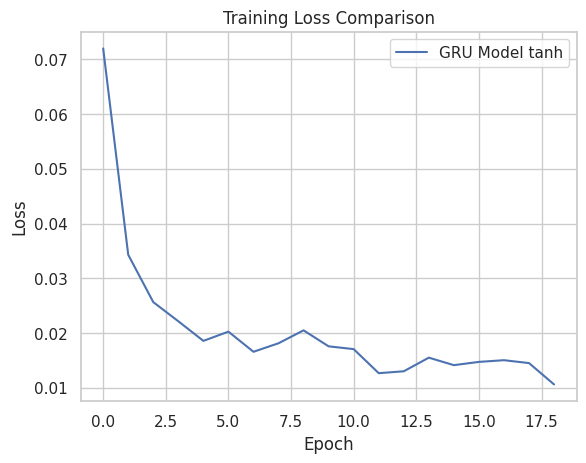

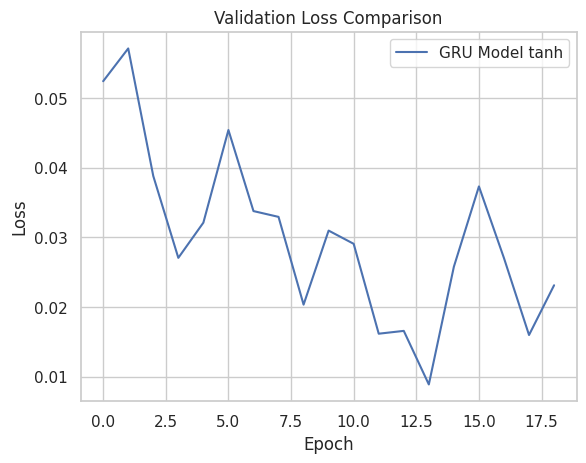

In [248]:
# Compare the training loss of each model

plt.plot(history_cnn_gru['loss'], label='GRU Model tanh')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare the validation loss of each model

plt.plot(history_cnn_gru['val_loss'], label='GRU Model tanh')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

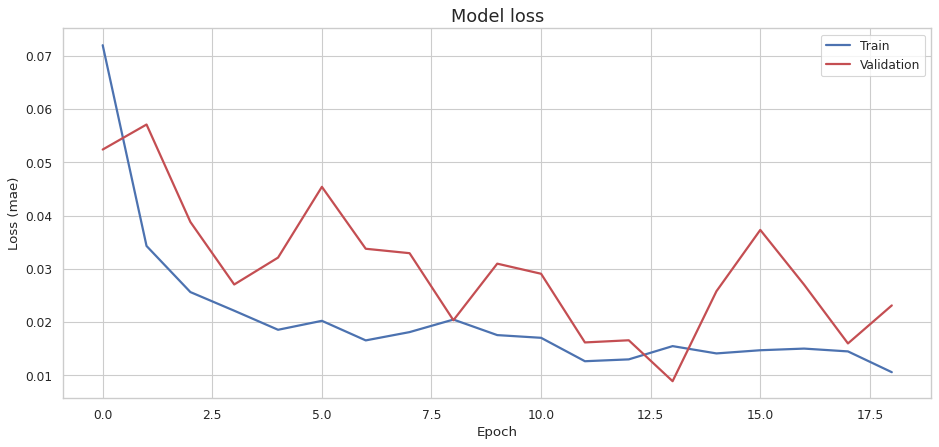

In [249]:
#history=history4
#model=model4

history=history_cnn_gru
model=model_cnn_gru
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [306]:
import joblib

# Replace 'path/to/your/model_cnn_gru.pkl' with the actual path to your model file
model_cnn_gru = joblib.load('/content/model_cnn_gru.pkl')

In [307]:
# prompt: bu model ile prediction yap mae mse rmse mape hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

if model == model_cnn_gru:
    X_pred = model.predict(X_test)


    # Reshape to (samples, features) while considering the timesteps
    mae = mean_absolute_error(X_test.reshape(X_test.shape[0], -1),
                              X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions
    mse = mean_squared_error(X_test.reshape(X_test.shape[0], -1),
                              X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(X_test.reshape(X_test.shape[0], -1),
                                        X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")


In [308]:
# prompt: # prompt: bu model ile prediction yap mae mse rmse mape ve r2 hesapla

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

if model == model_cnn_gru:
    X_pred = model.predict(X_test)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_test.reshape(X_test.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R2: {r2}")

In [309]:
# plot the loss distribution of the training set


X_pred = model.predict(X_train)

if model == model4:
    X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
    X_pred = X_pred[:, -1, :]
    X_pred = X_pred.reshape(X_pred.shape[0], -1)

X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
if model == model4:
    Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
else:
    Xtrain = X_train[:, -1, :]
    Xtrain = Xtrain.reshape(X_train.shape[0], -1)
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [282]:
features

66          Grd_Prod_ReactPwr_Std
26    Prod_LatestAvg_ReactPwrGen0
65          Grd_Prod_ReactPwr_Min
63          Grd_Prod_ReactPwr_Avg
29     Prod_LatestAvg_TotReactPwr
64          Grd_Prod_ReactPwr_Max
56          Grd_Prod_CurPhse3_Avg
39            Blds_PitchAngle_Min
Name: feature, dtype: object

Otomatik olarak belirlenen eşik değeri: 0.07696399141703926


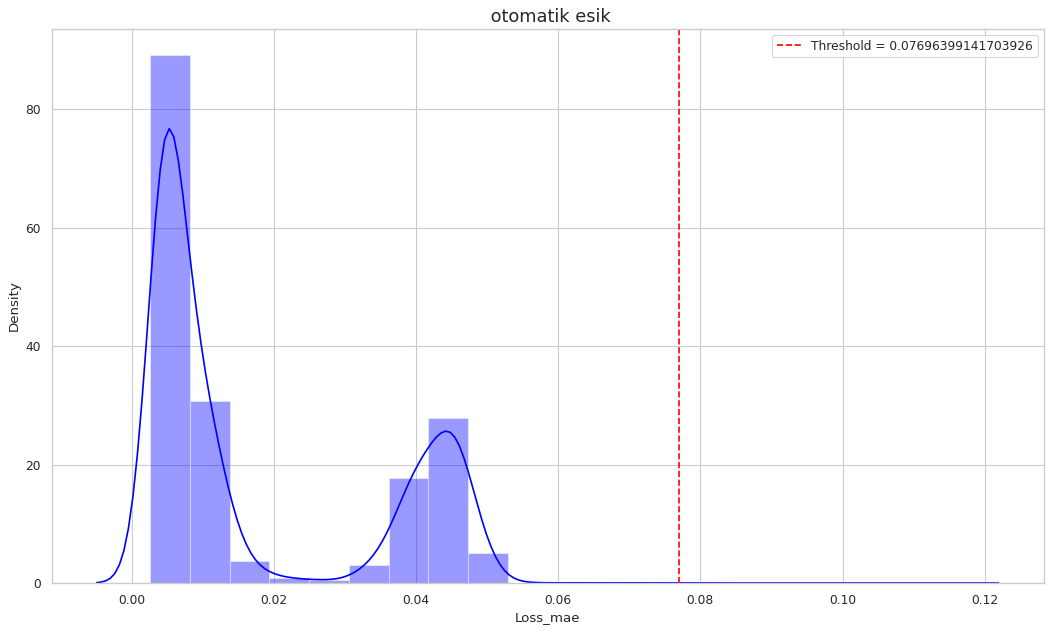

In [310]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 3.5 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()


# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")

In [311]:
# prompt: train veriseti üzerinden F1 skora göre threshold belirle  (şayet trainde fault var ise F1 skora göre belirler, train tamamı normal ise bu defa, itreasyon ile anomaly==0 olacak şekilde en küçük treshold belirler))

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve

# Tahmin edilen anomali skorlarını (Loss_mae) alın
y_scores = scored['Loss_mae'].values

# Gerçek etiketleri (Fault) alın
y_true = trainhy['Fault'].values

# F1 skorunu maksimize eden eşik değerini bulun
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = [score if not np.isnan(score) else 0 for score in f1_scores]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]*1.2

print(f"F1 skoru için en iyi eşik değeri: {optimal_threshold}")

# Eşik değeri kullanarak tahminleri oluşturun
y_pred = [1 if score > optimal_threshold else 0 for score in y_scores]

# Performansı değerlendirin
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"F1 skoru: {f1}")
print(f"Doğruluk: {accuracy}")
print(f"Keskinlik: {precision}")
print(f"Duyarlılık: {recall}")

# Eşik değeri ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {optimal_threshold}")

# İsteğe bağlı olarak, bulduğunuz eşik değerini kullanarak anomali tespitini yapabilirsiniz:
# anomalies = scored[scored['Loss_mae'] > optimal_threshold]

if f1==0:
    threshold_values = np.linspace(0, 5, 10)  # 0 ile 1 arasında 50 eşik değeri oluştur
    num_anomalies_list = []

    for threshold in threshold_values:
        X_pred = model.predict(X_train)

        if model == model4:
            X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
        else:
            X_pred = X_pred[:, -1, :]
            X_pred = X_pred.reshape(X_pred.shape[0], -1)

        X_pred = pd.DataFrame(X_pred, columns=train.columns)
        X_pred.index = train.index

        scored = pd.DataFrame(index=train.index)
        if model == model4:
            Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
        else:
            Xtrain = X_train[:, -1, :]
            Xtrain = Xtrain.reshape(X_train.shape[0], -1)
        scored['Loss_mae'] = np.mean(np.abs(X_pred - Xtrain), axis=1)

        # Anomalileri tespit et
        anomalies = scored[scored['Loss_mae'] > threshold]

        num_anomalies_list.append(len(anomalies))

    # 0 anomali sayısına sahip ilk eşik değerini bul
    for i, num_anomalies in enumerate(num_anomalies_list):
        if num_anomalies == 0:
            first_threshold_with_zero_anomalies = threshold_values[i]
            print(f"0 anomaliye sahip ilk eşik değeri: {first_threshold_with_zero_anomalies}")
            threshold_value = first_threshold_with_zero_anomalies
            break
else:
    threshold_value = optimal_threshold



F1 skoru için en iyi eşik değeri: 0.13732979806405443
F1 skoru: 0.0
Doğruluk: 1.0
Keskinlik: 0.0
Duyarlılık: 0.0
Otomatik olarak belirlenen eşik değeri: 0.13732979806405443
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0 anomaliye sahip ilk eşik değeri: 0.5555555555555556


In [285]:
    threshold_value = optimal_threshold


In [286]:
# plot the loss distribution of the training set


X_pred = model.predict(X_train)
  # Son zaman adımının tahminlerini seçin
if model == model4:
  X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
  X_pred = X_pred[:, -1, :]
  X_pred = X_pred.reshape(X_pred.shape[0], -1)
  # X_pred'i 2 boyutlu hale getirin

X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)

if model == model4:
    Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
else:
    Xtrain = X_train[:, -1, :]
    Xtrain = Xtrain.reshape(X_train.shape[0], -1)
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


In [287]:
X_pred = model.predict(X_test)

if model == model4:
  X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
  X_pred = X_pred[:, -1, :]
  X_pred = X_pred.reshape(X_pred.shape[0], -1)

X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored= pd.DataFrame(index=test.index)
if model == model4:
  Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
else:
  Xtest = X_test[:, -1, :]
  Xtest = X_test.reshape(X_pred.shape[0], -1)

scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [288]:
X_pred

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-10-08 23:00:00+00:00               0.127620                     0.060928   
2016-10-08 23:10:00+00:00               0.084307                     0.203363   
2016-10-08 23:20:00+00:00               0.082256                     0.198284   
2016-10-08 23:30:00+00:00               0.104987                     0.156001   
2016-10-08 23:40:00+00:00               0.074515                     0.210171   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.150992                     0.689457   
2016-12-31 22:20:00+00:00               0.200461                     0.690059   
2016-12-31 22:30:00+00:00               0.144852                     0.691002   
2016-12-31 23:10:00+00:00               0.189433                     0.684803   
2016-12-31 23:50:00+00:00               0.211607                     0.684052   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-10-08 23:00:00+00:00               0.970861               1.015686   
2016-10-08 23:10:00+00:00               0.983669               1.017938   
2016-10-08 23:20:00+00:00               0.985108               1.023903   
2016-10-08 23:30:00+00:00               0.980021               1.021571   
2016-10-08 23:40:00+00:00               0.986022               1.019026   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.620827               0.612034   
2016-12-31 22:20:00+00:00               0.600200               0.596067   
2016-12-31 22:30:00+00:00               0.619767               0.610250   
2016-12-31 23:10:00+00:00               0.581978               0.575280   
2016-12-31 23:50:00+00:00               0.573603               0.569473   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-10-08 23:00:00+00:00                    1.003745               0.660372   
2016-10-08 23:10:00+00:00                    1.009005               0.658064   
2016-10-08 23:20:00+00:00                    1.014751               0.661031   
2016-10-08 23:30:00+00:00                    1.011629               0.662333   
2016-10-08 23:40:00+00:00                    1.010128               0.657634   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.608210               0.394839   
2016-12-31 22:20:00+00:00                    0.592950               0.389634   
2016-12-31 22:30:00+00:00                    0.606494               0.392391   
2016-12-31 23:10:00+00:00                    0.571409               0.375444   
2016-12-31 23:50:00+00:00                    0.565881               0.373261   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  
Timestamp                                                              
2016-10-08 23:00:00+00:00               0.026685             0.655721  
2016-10-08 23:10:00+00:00               0.023099             0.586719  
2016-10-08 23:20:00+00:00               0.023128             0.662251  
2016-10-08 23:30:00+00:00               0.025305             0.659121  
2016-10-08 23:40:00+00:00               0.022377             0.585283  
...                                          ...                  ...  
2016-12-31 21:40:00+00:00               0.321491             0.020035  
2016-12-31 22:20:00+00:00               0.302851             0.019782  
2016-12-31 22:30:00+00:00               0.291433             0.017988  
2016-12-31 23:10:00+00:00               0.432964             0.017844  
2016-12-31 23:50:00+00:00               0.449764             0.017423  

[4782 rows x 8 colu

In [289]:
Xtest

array([[0.16571429, 0.03564155, 0.94139317, ..., 0.62064938, 0.0028512 ,
        0.68592965],
       [0.10857143, 0.16496945, 0.94105827, ..., 0.62088297, 0.0025542 ,
        0.60552764],
       [0.10857143, 0.15478615, 0.93335566, ..., 0.62064938, 0.0024948 ,
        0.68592965],
       ...,
       [0.14285714, 0.68737271, 0.61185532, ..., 0.3774819 , 0.28856549,
        0.0201005 ],
       [0.18857143, 0.68737271, 0.58238446, ..., 0.3702406 , 0.43201663,
        0.02261307],
       [0.21142857, 0.68737271, 0.57267247, ..., 0.36346648, 0.44948025,
        0.02261307]])

In [290]:
# prompt: plotly ile çiz ve threshold çizgisini ve gerçek arıza noktalarını yerleştir

import plotly.graph_objects as go
scored_test=scored.copy()
scored_test['Fault']=testhy['Fault']
# Calculate the exponential moving average (EMA)
window = 6 # Adjust the window size as needed
scored_test['EMA'] = scored_test['Loss_mae'].ewm(span=window, adjust=False).mean()

# Create a figure
fig = go.Figure()

# Add the loss values as a scatter plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['Loss_mae'],
    mode='lines',
    name='Loss'
))

# Add the EMA as a line plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['EMA'],
    mode='lines',
    name='EMA'
))

# Add the threshold line
fig.add_shape(
    type="line",
    x0=scored_test.index.min(),
    x1=scored_test.index.max(),
    y0=threshold_value,
    y1=threshold_value,
    line=dict(
        color="red",
        dash="dash",
    )
)

# Add the actual fault points
fault_indices = testhy[testhy['Fault'] == 1].index
fig.add_trace(go.Scatter(
    x=fault_indices,
    y=scored_test.loc[fault_indices]['Loss_mae'],
    mode='markers',
    name='Actual Faults',
    marker=dict(
        color='green',
        size=8
    )
))

# Set the layout
fig.update_layout(
    title="Test Data Loss over Time with Threshold and Actual Faults",
    xaxis_title="Time",
    yaxis_title="Loss",
    showlegend=True
)

# Display the plot
fig.show()


In [291]:
# prompt: eşiğin aşıldığı  zamanları tarih bilgisiyle birlikte kesikli çizgilerle grafikte göster göster

import plotly.graph_objects as go

# ... (Your existing code) ...

# Create a figure
fig = go.Figure()

# Add the loss values as a scatter plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['Loss_mae'],
    mode='lines',
    name='Loss'
))

# Add the EMA as a line plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['EMA'],
    mode='lines',
    name='EMA'
))

# Add the threshold line
fig.add_shape(
    type="line",
    x0=scored_test.index.min(),
    x1=scored_test.index.max(),
    y0=threshold_value,
    y1=threshold_value,
    line=dict(
        color="red",
        dash="dash",
    )
)


# Find the time points where the threshold is exceeded
threshold_exceeded_indices = scored_test[scored_test['Loss_mae'] > threshold_value].index

# Add vertical lines for threshold exceedances
for index in threshold_exceeded_indices:
  fig.add_shape(
      type="line",
      x0=index,
      x1=index,
      y0=0,
      y1=scored_test['Loss_mae'].max(),
      line=dict(
          color="black",
          dash="dash",
      )
  )

# Add the actual fault points
fault_indices = testhy[testhy['Fault'] == 1].index
fig.add_trace(go.Scatter(
    x=fault_indices,
    y=scored_test.loc[fault_indices]['Loss_mae'],
    mode='markers',
    name='Actual Faults',
    marker=dict(
        color='green',
        size=8
    )
))

# Set the layout
fig.update_layout(
    title="Test Data Loss over Time with Threshold and Actual Faults",
    xaxis_title="Time",
    yaxis_title="Loss",
    showlegend=True
)

# Display the plot
fig.show()


In [292]:
# prompt: eşiğin aşılma zamanlarını göster

# Find the time points where the threshold is exceeded
threshold_exceeded_indices = scored_test[scored_test['Loss_mae'] > threshold_value].index

# Print the time points
print("Eşik Değerini Aşan Zaman Noktaları:")
for index in threshold_exceeded_indices:
  print(index)

Eşik Değerini Aşan Zaman Noktaları:
2016-10-17 17:50:00+00:00


In [293]:
# prompt: 2 sinyal hariç diğer tüm sinyaller doğruysa doğruluğu hesapla

# Gerçek arızaları ve tespit edilen arızaları karşılaştır
true_positives = 0
false_positives = 0
false_negatives = 0

for index, row in scored_test.iterrows():
    if row['Fault'] == 1 and row['Loss_mae'] > threshold_value:
        true_positives += 1
    elif row['Fault'] == 0 and row['Loss_mae'] > threshold_value:
        false_positives += 1
    elif row['Fault'] == 1 and row['Loss_mae'] <= threshold_value:
        false_negatives += 1

# Doğruluk, hassasiyet ve F1 puanını hesapla
if true_positives + false_positives > 0:
    precision = true_positives / (true_positives + false_positives)
else:
    precision = 0

if true_positives + false_negatives > 0:
    recall = true_positives / (true_positives + false_negatives)
else:
    recall = 0

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

accuracy = (true_positives + (len(scored_test) - (true_positives + false_positives + false_negatives))) / len(scored_test)

# Sonuçları yazdır
print("Doğru Pozitifler:", true_positives)
print("Yanlış Pozitifler:", false_positives)
print("Yanlış Negatifler:", false_negatives)
print("Hassasiyet:", precision)
print("Geri Çağırma:", recall)
print("F1 Puanı:", f1_score)
print("Doğruluk:", accuracy)

Doğru Pozitifler: 1
Yanlış Pozitifler: 0
Yanlış Negatifler: 0
Hassasiyet: 1.0
Geri Çağırma: 1.0
F1 Puanı: 1.0
Doğruluk: 1.0


In [294]:
# prompt: doğru negatifleri de kullan

# ... (Your existing code) ...

# Gerçek arızaları ve tespit edilen arızaları karşılaştır
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0  # Doğru negatifleri hesaplamak için değişken

for index, row in scored_test.iterrows():
    if row['Fault'] == 1 and row['Loss_mae'] > threshold_value:
        true_positives += 1
    elif row['Fault'] == 0 and row['Loss_mae'] > threshold_value:
        false_positives += 1
    elif row['Fault'] == 1 and row['Loss_mae'] <= threshold_value:
        false_negatives += 1
    elif row['Fault'] == 0 and row['Loss_mae'] <= threshold_value:
        true_negatives += 1  # Doğru negatifleri say

# Doğruluk, hassasiyet, geri çağırma ve F1 puanını hesapla
if true_positives + false_positives > 0:
    precision = true_positives / (true_positives + false_positives)
else:
    precision = 0

if true_positives + false_negatives > 0:
    recall = true_positives / (true_positives + false_negatives)
else:
    recall = 0

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

accuracy = (true_positives + true_negatives) / len(scored_test)

# Sonuçları yazdır
print("Doğru Pozitifler:", true_positives)
print("Yanlış Pozitifler:", false_positives)
print("Yanlış Negatifler:", false_negatives)
print("Doğru Negatifler:", true_negatives)  # Doğru negatifleri yazdır
print("Hassasiyet:", precision)
print("Geri Çağırma:", recall)
print("F1 Puanı:", f1_score)
print("Doğruluk:", accuracy)

Doğru Pozitifler: 1
Yanlış Pozitifler: 0
Yanlış Negatifler: 0
Doğru Negatifler: 4781
Hassasiyet: 1.0
Geri Çağırma: 1.0
F1 Puanı: 1.0
Doğruluk: 1.0


In [295]:
# prompt: Doğru Pozitifler:
# Yanlış Pozitifler:
# Yanlış Negatifler:
# Doğru Negatifler:         değerlerini manuel gir ve metrikleri hesapla

# Değerleri manuel olarak girin
true_positives = 11
false_positives = 2
false_negatives = 0
true_negatives = 6789

# Hassasiyet hesapla
if true_positives + false_positives > 0:
  precision = true_positives / (true_positives + false_positives)
else:
  precision = 0

# Geri çağırma hesapla
if true_positives + false_negatives > 0:
  recall = true_positives / (true_positives + false_negatives)
else:
  recall = 0

# F1 puanı hesapla
if precision + recall > 0:
  f1_score = 2 * (precision * recall) / (precision + recall)
else:
  f1_score = 0

# Doğruluk hesapla
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)


# Sonuçları yazdır
print("Doğru Pozitifler:", true_positives)
print("Yanlış Pozitifler:", false_positives)
print("Yanlış Negatifler:", false_negatives)
print("Doğru Negatifler:", true_negatives)
print("Hassasiyet:", precision)
print("Geri Çağırma:", recall)
print("F1 Puanı:", f1_score)
print("Doğruluk:", accuracy)

Doğru Pozitifler: 11
Yanlış Pozitifler: 2
Yanlış Negatifler: 0
Doğru Negatifler: 6789
Hassasiyet: 0.8461538461538461
Geri Çağırma: 1.0
F1 Puanı: 0.9166666666666666
Doğruluk: 0.9997059688326962


In [296]:
# prompt: yukarıdaki modeli kullanarak predicition yap

# Make predictions on the test data

X_pred = model.predict(X_test)

    # Reshape the predictions
if model==model4:
        X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

else:
        X_pred = X_pred[:, -1, :]
        X_pred = X_pred.reshape(X_pred.shape[0], -1)


    # Convert predictions to a DataFrame
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

    # Calculate the reconstruction loss
scored = pd.DataFrame(index=test.index)
if model==model4:

   Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
else:
   Xtest = X_test[:, -1, :]
   Xtest = Xtest.reshape(X_test.shape[0], -1)

scored['Loss_mae'] = np.mean(np.abs(X_pred - Xtest), axis=1)

    # Add the actual fault values to the scored DataFrame
scored['Fault'] = testhy['Fault']

    # Calculate the EMA (Exponential Moving Average)
window = 50  # Adjust the window size as needed
scored['EMA'] = scored['Loss_mae'].ewm(span=window, adjust=False).mean()

    # Identify anomalies based on the threshold
anomalies = scored[scored['Loss_mae'] > threshold_value]

    # Print the anomalies
print("Anomalies:")
print(anomalies)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Anomalies:
                           Loss_mae  Fault       EMA
Timestamp                                           
2016-10-17 17:50:00+00:00  0.272169      1  0.029494


In [297]:
Xtest

array([[0.16571429, 0.03564155, 0.94139317, ..., 0.62064938, 0.0028512 ,
        0.68592965],
       [0.10857143, 0.16496945, 0.94105827, ..., 0.62088297, 0.0025542 ,
        0.60552764],
       [0.10857143, 0.15478615, 0.93335566, ..., 0.62064938, 0.0024948 ,
        0.68592965],
       ...,
       [0.14285714, 0.68737271, 0.61185532, ..., 0.3774819 , 0.28856549,
        0.0201005 ],
       [0.18857143, 0.68737271, 0.58238446, ..., 0.3702406 , 0.43201663,
        0.02261307],
       [0.21142857, 0.68737271, 0.57267247, ..., 0.36346648, 0.44948025,
        0.02261307]])

In [298]:
# prompt: feature selection sütunlarını göster
selected_features_xgb

66          Grd_Prod_ReactPwr_Std
26    Prod_LatestAvg_ReactPwrGen0
65          Grd_Prod_ReactPwr_Min
63          Grd_Prod_ReactPwr_Avg
29     Prod_LatestAvg_TotReactPwr
64          Grd_Prod_ReactPwr_Max
56          Grd_Prod_CurPhse3_Avg
39            Blds_PitchAngle_Min
Name: feature, dtype: object

In [299]:
import plotly.graph_objects as go

# Assuming 'scaler1' is the MinMaxScaler object used for scaling
X_pred_original = scaler.inverse_transform(X_pred)
Xtest_original = scaler.inverse_transform(Xtest)

# Create a DataFrame with the original values
X_pred_org = pd.DataFrame(X_pred_original, columns=test.columns, index=test.index)
Xtest_org = pd.DataFrame(Xtest_original, columns=test.columns, index=test.index)

# Select a few features for visualization
features_to_plot = my_tuple

# Create subplots for each selected feature
for feature in features_to_plot:
  fig = go.Figure()

  # Plot X_pred values
  fig.add_trace(go.Scatter(
      x=X_pred_org.index,
      y=X_pred_org[feature],
      mode='lines',
      name='X_pred',
      line=dict(color='blue')
  ))

  # Plot X_test values
  fig.add_trace(go.Scatter(
      x=X_pred_org.index,
      y=Xtest_org[feature],  # Use the column name directly to access the values
      mode='lines',
      name='X_test',
      line=dict(color='red')
  ))

      # Add the threshold line
  fig.add_shape(
      type="line",
      x0=scored_test.index.min(),
      x1=scored_test.index.max(),
      y0=threshold_value,
      y1=threshold_value,
      line=dict(
          color="red",
          dash="dash"
  ))

  fig.update_layout(
      title=f"Comparison of {feature} between X_pred and X_test",
      xaxis_title="Time",
      yaxis_title=feature,
      showlegend=True
  )

  fig.show()

In [300]:
data_af

Grd_Prod_ReactPwr_Std  Prod_LatestAvg_ReactPwrGen0  \
Timestamp                                                                       
2016-01-01 00:00:00+00:00               0.011297                     0.878939   
2016-01-01 00:20:00+00:00               0.028920                     0.878939   
2016-01-01 00:30:00+00:00               0.007682                     0.878939   
2016-01-01 01:00:00+00:00               0.007456                     0.878939   
2016-01-01 01:10:00+00:00               0.008812                     0.878939   
...                                          ...                          ...   
2016-12-31 21:40:00+00:00               0.006326                     0.878939   
2016-12-31 22:20:00+00:00               0.008360                     0.878939   
2016-12-31 22:30:00+00:00               0.006100                     0.878939   
2016-12-31 23:10:00+00:00               0.007908                     0.878939   
2016-12-31 23:50:00+00:00               0.008812                     0.878939   

                           Grd_Prod_ReactPwr_Min  Grd_Prod_ReactPwr_Avg  \
Timestamp                                                                 
2016-01-01 00:00:00+00:00               0.822283               0.507414   
2016-01-01 00:20:00+00:00               0.814977               0.487025   
2016-01-01 00:30:00+00:00               0.817717               0.480229   
2016-01-01 01:00:00+00:00               0.832420               0.506333   
2016-01-01 01:10:00+00:00               0.834064               0.511585   
...                                          ...                    ...   
2016-12-31 21:40:00+00:00               0.807215               0.463546   
2016-12-31 22:20:00+00:00               0.802100               0.456596   
2016-12-31 22:30:00+00:00               0.807397               0.462156   
2016-12-31 23:10:00+00:00               0.799361               0.448255   
2016-12-31 23:50:00+00:00               0.796712               0.447019   

                           Prod_LatestAvg_TotReactPwr  Grd_Prod_ReactPwr_Max  \
Timestamp                                                                      
2016-01-01 00:00:00+00:00                    0.505458               0.156066   
2016-01-01 00:20:00+00:00                    0.484956               0.186992   
2016-01-01 00:30:00+00:00                    0.478227               0.143153   
2016-01-01 01:00:00+00:00                    0.504388               0.153834   
2016-01-01 01:10:00+00:00                    0.509646               0.158935   
...                                               ...                    ...   
2016-12-31 21:40:00+00:00                    0.461270               0.131197   
2016-12-31 22:20:00+00:00                    0.454495               0.129045   
2016-12-31 22:30:00+00:00                    0.460023               0.128806   
2016-12-31 23:10:00+00:00                    0.446286               0.126335   
2016-12-31 23:50:00+00:00                    0.444909               0.124024   

                           Grd_Prod_CurPhse3_Avg  Blds_PitchAngle_Min  Fault  
Timestamp                                                                     
2016-01-01 00:00:00+00:00               0.127922             0.012903      0  
2016-01-01 00:20:00+00:00               0.187849             0.011828      0  
2016-01-01 00:30:00+00:00               0.237570             0.007527      0  
2016-01-01 01:00:00+00:00               0.134093             0.007527      0  
2016-01-01 01:10:00+00:00               0.110775             0.015054      0  
...                                          ...                  ...    ...  
2016-12-31 21:40:00+00:00               0.320161             0.009677      0  
2016-12-31 22:20:00+00:00               0.302302             0.009677      0  
2016-12-31 22:30:00+00:00               0.289368             0.008602      0  
2016-12-31 23:10:00+00:00               0.432657             0.009677      0  
2016-12-

In [301]:
# prompt: data_af her bir features isimleri için ayrı ayrı  test ve train için mae mape rmse mse r2 değerlerini hesapla

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

if model == model_cnn_gru:
    X_pred = model.predict(X_test)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_test.reshape(X_test.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        print(f"Feature {test.columns[feature_index]}")
        print(f"  MAE: {mae}")
        print(f"  MSE: {mse}")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}")
        print(f"  R2: {r2}")


if model == model_cnn_gru:
    X_pred = model.predict(X_train)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_train.reshape(X_train.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        print(f"Train Feature {train.columns[feature_index]}")
        print(f"  MAE: {mae}")
        print(f"  MSE: {mse}")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}")
        print(f"  R2: {r2}")

In [302]:
# prompt:       print(f"Train Feature {train.columns[feature_index]}")
#         print(f"  MAE: {mae}")
#         print(f"  MSE: {mse}")
#         print(f"  RMSE: {rmse}")
#         print(f"  MAPE: {mape}")
#         print(f"  R2: {r2}")     sonuçları için tablo oluştur

import pandas as pd

results_data = []

if model == model_cnn_gru:
    X_pred = model.predict(X_train)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_train.reshape(X_train.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        results_data.append([train.columns[feature_index], mae, mse, rmse, mape, r2])

results_df = pd.DataFrame(results_data, columns=['Feature', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
results_df

Empty DataFrame
Columns: [Feature, MAE, MSE, RMSE, MAPE, R2]
Index: []

In [303]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results_df)

https://docs.google.com/spreadsheets/d/1WLcnzlfFtkLFMYnr38cyoydbcwlJ_aiKR1WMpddMD6U#gid=0


In [304]:
# prompt: grafiğin arka planı beyaz olsu

fig.update_layout(
    plot_bgcolor='white',  # Arka plan rengini beyaz olarak ayarlayın
    xaxis=dict(gridcolor='lightgray'),  # X ekseni ızgara rengini açık gri olarak ayarlayın
    yaxis=dict(gridcolor='lightgray')   # Y ekseni ızgara rengini açık gri olarak ayarlayın
)
fig.show()
